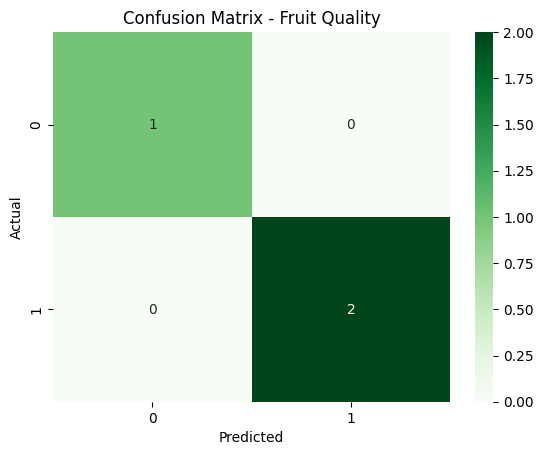

C:\Users\svish\AppData\Local\Temp\ipykernel_3708\3077697189.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=feature_names, palette="viridis")


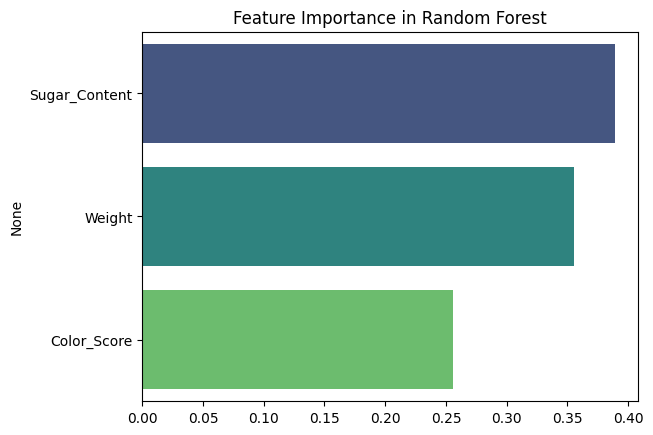

(1.0, 1.0, 1.0, 1.0)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

data = {
    'Sugar_Content': [10, 12, 8, 15, 14, 7, 9, 16, 13, 11],
    'Weight': [150, 160, 140, 180, 175, 130, 145, 190, 165, 155],
    'Color_Score': [7, 8, 6, 9, 8.5, 5.5, 6.5, 9.2, 8.1, 7.5],
    'Quality': [1, 1, 0, 1, 1, 0, 0, 1, 1, 1]
}

df = pd.DataFrame(data)

X = df[['Sugar_Content', 'Weight', 'Color_Score']]
y = df['Quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

acc, prec, rec, f1

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Fruit Quality")
plt.show()

importances = model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names, palette="viridis")
plt.title("Feature Importance in Random Forest")
plt.show()
acc, prec, rec, f1